In [1]:
#drive内のファイルを扱えるようにします．
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


初回は確認の旨が出てきますので許可してください

In [5]:
import pandas as pd #scvファイルを扱うのでインポートします
import matplotlib.pyplot as plt #図を描くのでインポートします
import seaborn as sns #散布図書くかもしれないので入れます

In [3]:
#dataっていう枠組み＝precure_datasetsとする設定，sep=","はコンマごとに区切るよって意味
#パスは多分このままいけると思います．
data= pd.read_csv('/content/drive/My Drive/precure_datasets.csv', sep=",")

In [4]:
data.describe #データののぞき見

<bound method NDFrame.describe of     generation       name  visual rate(kids average)  \
0            1  the first                       17.8   
1            2         mh                       17.2   
2            3         ss                       13.2   
3            4       five                       16.6   
4            5         go                       13.2   
5            6      fresh                       15.0   
6            7         hc                       14.6   
7            8      sweet                       13.1   
8            9      smile                       12.4   
9           10   dokidoki                        9.4   
10          11  happiness                        9.1   
11          12   princess                        9.9   
12          13    magical                        8.0   
13          14   kirakira                        7.9   

    visual rate(all average)  Copyright Sales(million)  Toys Sales(million)  \
0                       7.29                  

<class 'seaborn.axisgrid.PairGrid'>


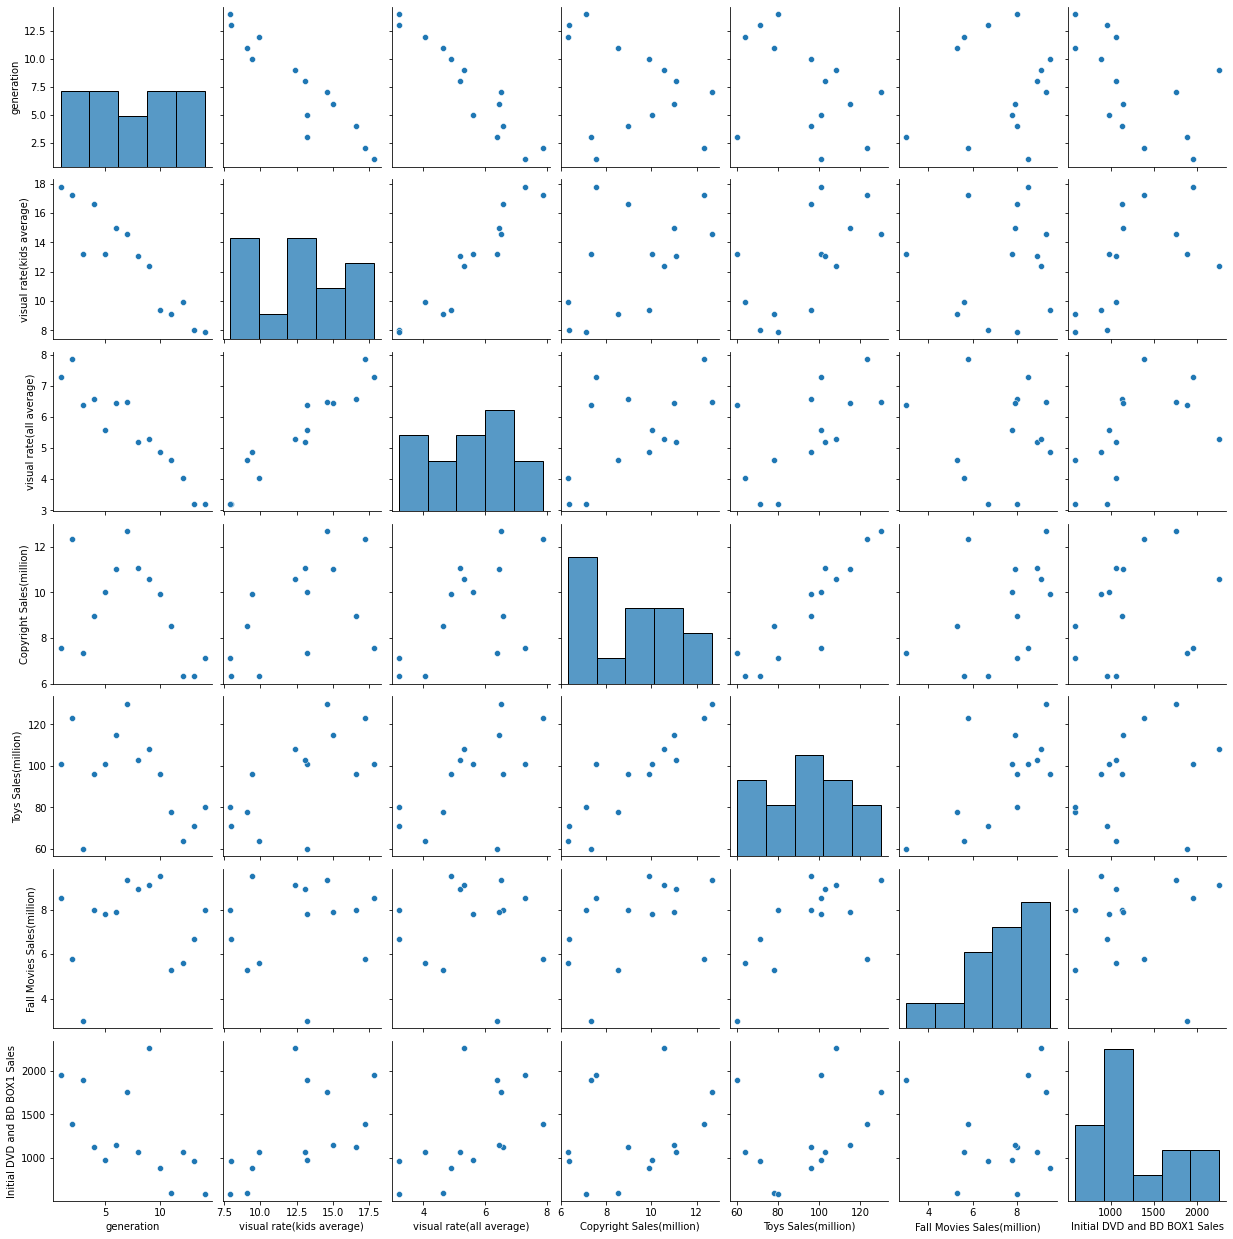

In [6]:
#今回はなんとなくの散布図見たい人のみ実行します．
"""
実際はアルゴリズムに突っ込めば，何かが返ってきますが，
ゴミを突っ込んでもゴミしか返ってきません．
データを基に何を目的とするか直感的に考えるためにも
図の出力は心がけることが重要
"""
pg = sns.pairplot(data)
print(type(pg)) #図の描写

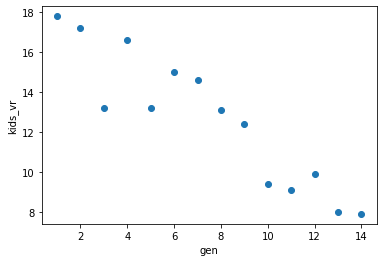

In [7]:
#ちょっといじってみましょう
gen = data[['generation']]
kids_vr = data[['visual rate(kids average)']]

plt.plot(gen, kids_vr, 'o') #xをgen，yをkids_vr
plt.xlabel("gen") #横軸のラベル名
plt.ylabel("kids_vr") #縦軸のラベル名
plt.show()

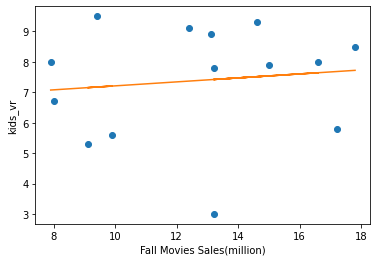

モデル関数の回帰変数 w1: 0.065
モデル関数の切片 w2: 6.557
秋映画の興行収入= 0.065子供の平均視聴率 + 6.557
決定係数 R^2：  0.013887666424555967


In [8]:
#早速，単回帰をします
from sklearn import linear_model
model = linear_model.LinearRegression()

#目的変数を Fall Movies Sales(million)　の値としますわ
y = data[["Fall Movies Sales(million)"]]

#ぶち込みます
model.fit(kids_vr,y)

plt.plot(kids_vr, y, 'o')
plt.plot(kids_vr, model.predict(kids_vr), linestyle="solid")
plt.xlabel("Fall Movies Sales(million)") #横軸のラベル名
plt.ylabel("kids_vr") #縦軸のラベル名
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model.coef_)
print('モデル関数の切片 w2: %.3f' %model.intercept_)
print('秋映画の興行収入= %.3f子供の平均視聴率 + %.3f' % (model.coef_ , model.intercept_))
print('決定係数 R^2： ', model.score(kids_vr, y))

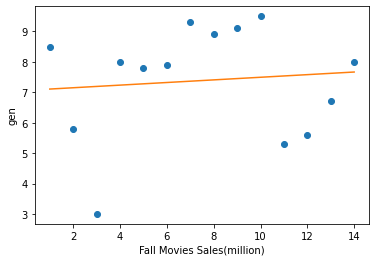

モデル関数の回帰変数 w1: 0.043
モデル関数の切片 w2: 7.063
秋映画の興行収入= 0.043プリキュア〇代目 + 7.063
決定係数 R^2：  0.009266468871360733


In [9]:
#genでもやってみる
model.fit(gen,y)

plt.plot(gen, y, 'o')
plt.plot(gen, model.predict(gen), linestyle="solid")
plt.xlabel("Fall Movies Sales(million)") #横軸のラベル名
plt.ylabel("gen") #縦軸のラベル名
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model.coef_)
print('モデル関数の切片 w2: %.3f' %model.intercept_)
print('秋映画の興行収入= %.3fプリキュア〇代目 + %.3f' % (model.coef_ , model.intercept_))
print('決定係数 R^2： ', model.score(gen, y))

以上，単回帰編でした